In [1]:
import re
from pdfminer.high_level import extract_pages, extract_text

for page_layout in extract_pages("pdf.pdf"):
    for element in page_layout:
        print(element)


<LTTextBoxHorizontal(0) 70.824,728.500,520.406,768.820 'Atlas Multiservices, filiale de Royal Air Maroc, lance une sélection de candidats destinés à intégrer la \nformation d’élèves pilotes de ligne afin d’exercer en qualité d’officier pilote de ligne au sein de la \nflotte de la Compagnie Nationale Royal Air Maroc \n'>
<LTTextBoxHorizontal(1) 76.584,677.830,95.903,716.710 'a \n123 \n764 \n'>
<LTTextBoxHorizontal(2) 227.620,677.830,246.915,716.710 'b \n754 \n98 \n'>
<LTTextBoxHorizontal(3) 413.930,705.670,420.985,716.710 'c \n'>
<LTTextBoxHorizontal(4) 378.620,677.830,392.155,702.790 '64 \n54 \n'>
<LTRect 70.824,719.020,71.304,719.500>
<LTRect 70.824,719.020,71.304,719.500>
<LTRect 71.304,719.020,221.854,719.500>
<LTRect 221.860,719.020,222.340,719.500>
<LTRect 222.340,719.020,373.110,719.500>
<LTRect 373.100,719.020,373.580,719.500>
<LTRect 373.580,719.020,524.110,719.500>
<LTRect 524.110,719.020,524.590,719.500>
<LTRect 524.110,719.020,524.590,719.500>
<LTRect 70.824,705.550,71.304,7

In [2]:
text = extract_text("pdf.pdf")
print(text)

Atlas Multiservices, filiale de Royal Air Maroc, lance une sélection de candidats destinés à intégrer la 
formation d’élèves pilotes de ligne afin d’exercer en qualité d’officier pilote de ligne au sein de la 
flotte de la Compagnie Nationale Royal Air Maroc 

a 
123 
764 

b 
754 
98 

c 

64 
54 

 
 



In [3]:
pattern = re.compile(r"[a-zA-Z]+,{1}\s{1}")
matches = pattern.findall(text)
print(matches)

['Multiservices, ', 'Maroc, ']


In [4]:
names = [n[:-2]for n in matches]
print(names)

['Multiservices', 'Maroc']


In [5]:
import fitz #PyMuPDF
import PIL.Image #pillow
import io
pdf = fitz.open("pdf.pdf")
counter = 1
for i in range(len(pdf)):
    page = pdf[i] 
    images = page.get_images()
    for image in images: 
        base_img = pdf.extract_image(image[0])
        print(base_img)
        

{'ext': 'jpeg', 'smask': 0, 'width': 177, 'height': 211, 'colorspace': 3, 'bpc': 8, 'xres': 96, 'yres': 96, 'cs-name': 'DeviceRGB', 'image': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x00ZExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x05\x03\x01\x00\x05\x00\x00\x00\x01\x00\x00\x00J\x03\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x00Q\x10\x00\x01\x00\x00\x00\x01\x01\x00\x00\x00Q\x11\x00\x04\x00\x00\x00\x01\x00\x00\x0e\xc3Q\x12\x00\x04\x00\x00\x00\x01\x00\x00\x0e\xc3\x00\x00\x00\x00\x00\x01\x86\xa0\x00\x00\xb1\x8f\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xd3\x00\xb1\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03

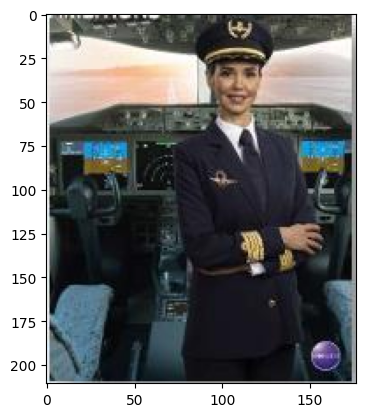

In [6]:
import fitz #PyMuPDF
import PIL.Image #pillow
import io
import matplotlib.pyplot as plt
pdf = fitz.open("pdf.pdf")
counter = 1
for i in range(len(pdf)):
    page = pdf[i] 
    images = page.get_images()
    for image in images: 
        base_img = pdf.extract_image(image[0])
        image_data =base_img["image"]
        img = PIL.Image.open(io.BytesIO(image_data))
        extension = base_img['ext']
        img.save(open(f"image{counter}.{extension}", "wb"))
        plt.imshow(img)
        counter+= 1

In [7]:
!pip install tabula-py  

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
#extract table
import tabula
tables = tabula.read_pdf("pdf.pdf", pages="all")
print(tables)
print(tables[0])


[     a    b  Unnamed: 0   c
0  123  754          64 NaN
1  764   98          54 NaN]
     a    b  Unnamed: 0   c
0  123  754          64 NaN
1  764   98          54 NaN


In [9]:
df = tables[0]
print(df[df.a >30])

     a    b  Unnamed: 0   c
0  123  754          64 NaN
1  764   98          54 NaN
